# Python Final Project - Occupancy Estimation- Prediction using environmental observations

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, f1_score
from sklearn.svm import SVC


In [2]:
# load data
dataset= pd.read_csv(r'D:\books\4th year 1st sem books\python\final project\main\dataset.csv')
dataset


,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.700000,26.272000,585.200000,749.200000,0.004764,1
1,23.718000,26.290000,578.400000,760.400000,0.004773,1
2,23.730000,26.230000,572.666667,769.666667,0.004765,1
3,23.722500,26.125000,493.750000,774.750000,0.004744,1
4,23.754000,26.200000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...
2660,24.290000,25.700000,808.000000,1150.250000,0.004829,1
2661,24.330000,25.736000,809.800000,1129.200000,0.004848,1
2662,24.330000,25.700000,817.000000,1125.800000,0.004841,1
2663,24.356667,25.700000,813.000000,1123.000000,0.004849,1


In [4]:
dataset.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000
mean,21.433876,25.353937,193.227556,717.906470,0.004027,0.364728
std,1.028024,2.436842,250.210906,292.681718,0.000611,0.481444
min,20.200000,22.100000,0.000000,427.500000,0.003303,0.000000
25%,20.650000,23.260000,0.000000,466.000000,0.003529,0.000000
50%,20.890000,25.000000,0.000000,580.500000,0.003815,0.000000
75%,22.356667,26.856667,442.500000,956.333333,0.004532,1.000000
max,24.408333,31.472500,1697.250000,1402.250000,0.005378,1.000000


In [5]:
dataset.reset_index(drop=True,inplace=True)


<AxesSubplot:>

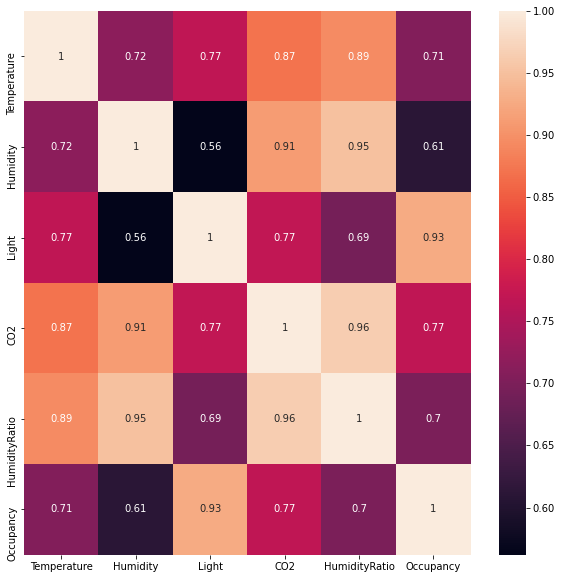

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(),annot=True)

Text(0.5, 1.0, 'Occupancy Distribution')

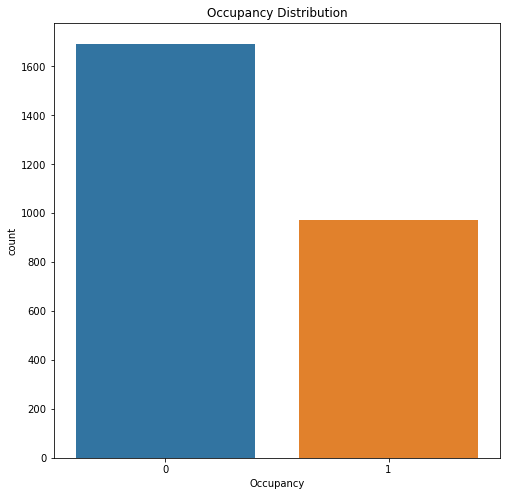

In [7]:
plt.figure(figsize=(8,8))
sns.countplot(x='Occupancy',data=dataset)
plt.title("Occupancy Distribution")

<AxesSubplot:xlabel='CO2', ylabel='Humidity'>

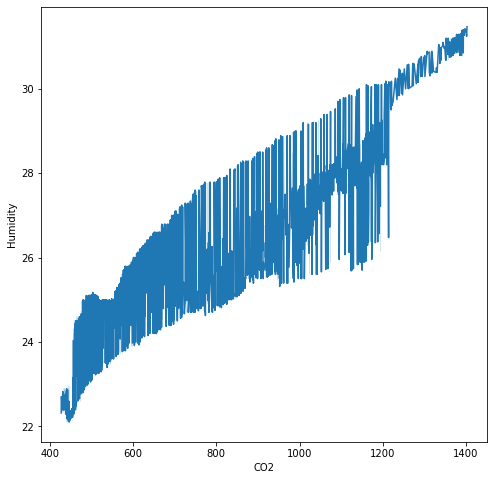

In [8]:
# As we can see form the correlation map, there's a huge relation between occupancy and light also between CO2 and humidity
fig = plt.figure(figsize=(8, 8))
sns.lineplot(x="CO2",y="Humidity", data=dataset)

<Figure size 1500x900 with 0 Axes>

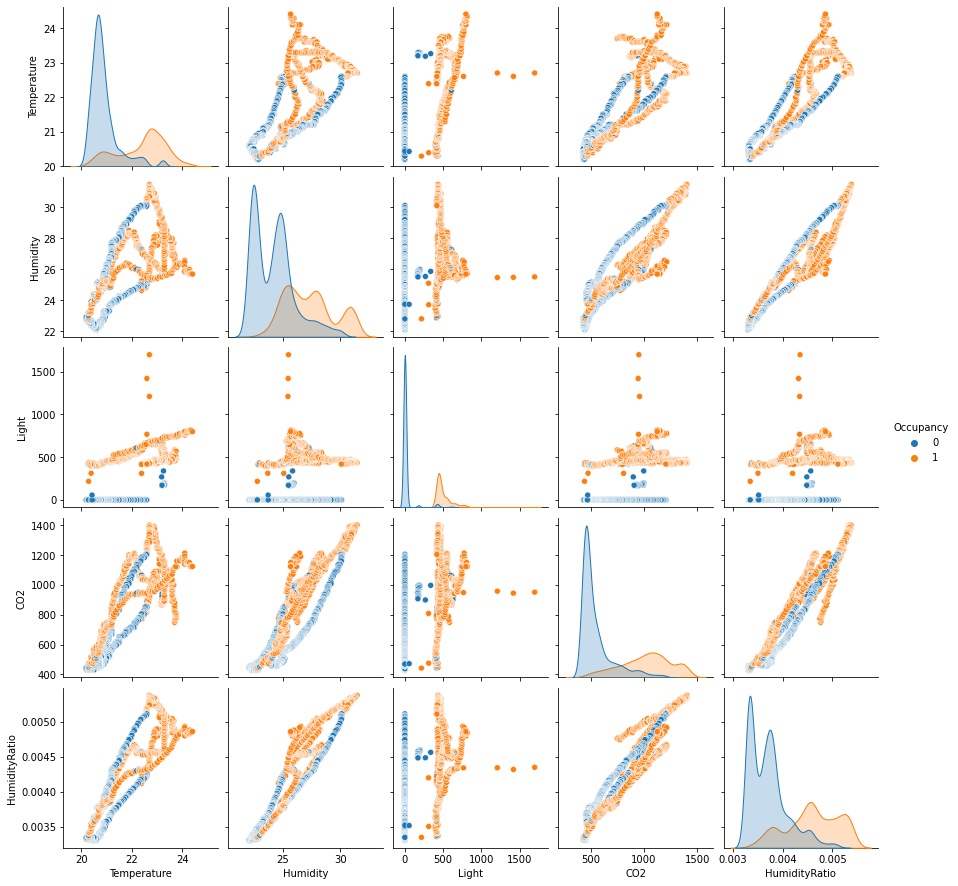

In [9]:
plt.figure(figsize=(10,6),dpi = 150)
sns.pairplot(dataset , hue = 'Occupancy')

In [10]:
X=dataset.drop('Occupancy', axis=1)
y=dataset['Occupancy']

In [11]:
# StandardScaler is to resize the distribution of values so that the mean of the observed values is 0 and the standard deviation is 1

scale=StandardScaler()
X=scale.fit_transform(X)
X

array([[2.20476235, 0.37681367, 1.56686218, 0.10694007, 1.20754022],
       [2.22227495, 0.38420166, 1.53968001, 0.14521407, 1.22146086],
       [2.23395002, 0.35957501, 1.51676171, 0.17688126, 1.20916118],
       ...,
       [2.81770341, 0.14203962, 2.4934545 , 1.39390353, 1.33301272],
       [2.84364801, 0.14203962, 2.47746498, 1.38433502, 1.34579091],
       [2.89391566, 0.13451481, 2.41750431, 1.38775235, 1.36487235]])

In [12]:
# Splitting the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33, shuffle=False)

print(X_train.shape);
print(X_test.shape);
print(y_train.shape);
print(y_test.shape);

(1785, 5)
(880, 5)
(1785,)
(880,)


# SVM Model

In [13]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
print("Accuracy for SVM on testing data: {}%".format(round((svm_model.score(X_test, y_test)*100),2)))

Accuracy for SVM on testing data: 97.84%


In [14]:
y_predict = svm_model.predict(X_test)
print(y_predict);

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [33]:
#Actual value and the predicted value
difference1 = pd.DataFrame({'Actual value': y_test, 'Predicted value':y_predict})
difference1

,Actual value,Predicted value
1785,0,0
1786,0,0
1787,0,0
1788,0,0
1789,0,0
...,...,...
2660,1,1
2661,1,1
2662,1,1
2663,1,1


Confusion Matrix is : 
 [[694  16]
 [  3 167]]


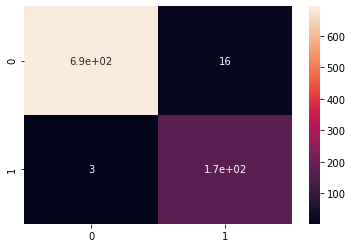

In [16]:
#Calculating Confusion Matrix
CM1 = confusion_matrix(y_test, y_predict)
sns.heatmap(CM1,annot=True)
print('Confusion Matrix is : \n', CM1)


In [17]:
#Calculating classification Report :  
Report = classification_report(y_test,y_predict)
print(Report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       710
           1       0.91      0.98      0.95       170

    accuracy                           0.98       880
   macro avg       0.95      0.98      0.97       880
weighted avg       0.98      0.98      0.98       880



In [18]:
# calculating mean squared error and root mean sqared error

mse=mean_squared_error(y_test,y_predict)
rms=math.sqrt(mse)
print("Mean Squared Error :",mse)
print("Root Mean Squared Error :",rms)


Mean Squared Error : 0.02159090909090909
Root Mean Squared Error : 0.14693845341131467


#  Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier  

classifier= DecisionTreeClassifier(criterion='entropy')  
classifier.fit(X_train, y_train)  

DecisionTreeClassifier(criterion='entropy')

In [20]:
classifier.score(X_test,y_test)
y_predict1 = classifier.predict(X_test)
print(y_predict1);

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [34]:
#Actual value and the predicted value
diff = pd.DataFrame({'Actual value': y_test, 'Predicted value':y_predict1})
diff

,Actual value,Predicted value
1785,0,0
1786,0,0
1787,0,0
1788,0,0
1789,0,0
...,...,...
2660,1,1
2661,1,1
2662,1,1
2663,1,1


Confusion Matrix is : 
 [[694  16]
 [ 19 151]]


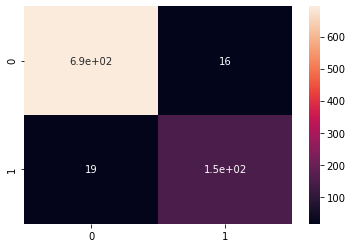

In [22]:
#Calculating Confusion Matrix
CM2 = confusion_matrix(y_test, y_predict1)
sns.heatmap(CM2,annot=True)
print('Confusion Matrix is : \n', CM2)

In [23]:
#Calculating classification Report :  
Report1 = classification_report(y_test,y_predict1)
print(Report1)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       710
           1       0.90      0.89      0.90       170

    accuracy                           0.96       880
   macro avg       0.94      0.93      0.94       880
weighted avg       0.96      0.96      0.96       880



In [24]:
# calculating mean squared error and root mean sqared error

mse1=mean_squared_error(y_test,y_predict1)
rms1=math.sqrt(mse1)
print("Mean Squared Error :",mse1)
print("Root Mean Squared Error :",rms1)


Mean Squared Error : 0.03977272727272727
Root Mean Squared Error : 0.1994310088043664


# KNN ( K- Nearest Neighbors)

In [25]:
#  trying different hyperparameters on KNN model
# for n= 1,5,10

# for n=1

knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
print(knn_model.score(X_test,y_test));

0.9738636363636364


In [26]:
# for n=5

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred1 = knn_model.predict(X_test)
print(knn_model.score(X_test,y_test));

0.9806818181818182


In [27]:
# for n=10

knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train, y_train)
y_pred2 = knn_model.predict(X_test)
print(knn_model.score(X_test,y_test));


0.9818181818181818


In [28]:
print(y_pred2);

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [35]:
#Actual value and the predicted value
difference = pd.DataFrame({'Actual value': y_test, 'Predicted value':y_pred2})
difference

,Actual value,Predicted value
1785,0,0
1786,0,0
1787,0,0
1788,0,0
1789,0,0
...,...,...
2660,1,1
2661,1,1
2662,1,1
2663,1,1


Confusion Matrix is : 
 [[694  16]
 [  0 170]]


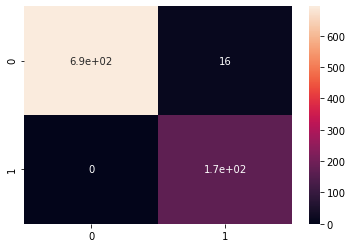

In [30]:
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_pred2)
sns.heatmap(CM,annot=True)
print('Confusion Matrix is : \n', CM)


In [31]:
#Calculating classification Report :  
Report3 = classification_report(y_test,y_pred2)
print(Report3)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       710
           1       0.91      1.00      0.96       170

    accuracy                           0.98       880
   macro avg       0.96      0.99      0.97       880
weighted avg       0.98      0.98      0.98       880



In [32]:
# calculating mean squared error and root mean sqared error

mse2=mean_squared_error(y_test,y_pred2)
rms2=math.sqrt(mse2)
print("Mean Squared Error :",mse2)
print("Root Mean Squared Error :",rms2)


Mean Squared Error : 0.01818181818181818
Root Mean Squared Error : 0.13483997249264842
